**Remarks**

In this part, we learn about NLP EDA in Indonesia Covid Vaccine TWEET. I hope you can learn more in my notebook. 

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

import warnings
warnings.filterwarnings('ignore')

# NLP Library
import re #regular expression
import nltk #natural-language-tool-kit

# visualization
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# loading data
data = pd.read_csv('../content/indonesian_vaccination_tweets.csv', encoding='utf-8')
data.head()

,id,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,reply_to_status
0,1348286903527768065,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,NaN
1,1348302168248340481,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,NaN
2,1348307055040348160,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,NaN
3,1348322660925669377,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,NaN
4,1348425614584266753,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,NaN


In [3]:
# show information data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13491 non-null  int64  
 1   date              13491 non-null  object 
 2   text              13491 non-null  object 
 3   hashtags          9134 non-null   object 
 4   user_name         13491 non-null  object 
 5   user_location     8498 non-null   object 
 6   user_description  11949 non-null  object 
 7   user_created      13491 non-null  object 
 8   user_followers    13491 non-null  int64  
 9   user_friends      13491 non-null  int64  
 10  user_favourites   13491 non-null  int64  
 11  user_verified     13491 non-null  bool   
 12  source            13488 non-null  object 
 13  retweets          13491 non-null  int64  
 14  favorites         13491 non-null  int64  
 15  is_retweet        13491 non-null  bool   
 16  reply_to_status   1190 non-null   float6

In [4]:
# shape dataframe
print("Shape of dataframe: ", data.shape)

Shape of dataframe:  (13491, 17)


In [5]:
# dropdown duplicate data
data.drop_duplicates(inplace=True)
print("Shape of dataframe after dropping duplicates: ", data.shape)

Shape of dataframe after dropping duplicates:  (13491, 17)


In [6]:
# Based on above, there is not duplicates data
# Take down null values
missing_data = pd.concat([data.isnull().sum().sort_values(ascending=False), (data.isnull().sum()/data.shape[0]).sort_values(ascending=False)], axis=1, keys=["Total missing", "Percent missing"])
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns = {"index":"column name"})
print("Null values in each column:", missing_data)

Null values in each column:          column name  Total missing  Percent missing
0    reply_to_status          12301         0.911793
1      user_location           4993         0.370099
2           hashtags           4357         0.322956
3   user_description           1542         0.114298
4             source              3         0.000222
5       user_created              0         0.000000
6               date              0         0.000000
7               text              0         0.000000
8          user_name              0         0.000000
9     user_followers              0         0.000000
10        is_retweet              0         0.000000
11      user_friends              0         0.000000
12   user_favourites              0         0.000000
13     user_verified              0         0.000000
14          retweets              0         0.000000
15         favorites              0         0.000000
16                id              0         0.000000


In [7]:
# based on information above, we take down reply_to_states due more than 70% missing
# Not appropriate information: id
data = data.drop(["id", "reply_to_status"], axis=1)
data.head()

,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet
0,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False
1,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False
2,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False
3,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False
4,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False


**BASIC Learn NLP**

We will gain information using NLP example and VADER sentiment analysis. Valence Aware Dictionary and sEntiment Reasoner is a lexicon and rule based sentiment analysis tool which works very well on social media sentiments. It is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

In [8]:
# !pip install vaderSentiment

In [16]:
import vaderSentiment
# import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# if you already have NLTK
#import nltk
#nltk.download('vader_lexicon')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

#analyser = SentimentIntensityAnalyzer()

In [17]:
# gain information using polarity scores of each text
def sentiment_polarity_score(sentence):
  score = analyzer.polarity_scores(sentence)
  print("{:-<40} {}".format(sentence, str(score)))

In [32]:
# testing function
tweet = "I hope doge will to the moon"
tweet2 = "I do not know about data analytics"
tweet3 = "I would like to intern in Google Company"
print(sentiment_polarity_score(tweet))
print(sentiment_polarity_score(tweet2))
print(sentiment_polarity_score(tweet3))

I hope doge will to the moon------------ {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
None
I do not know about data analytics------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
I would like to intern in Google Company {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
None


In [33]:
# Please note : 
# 1. Positive : compound score >= 0.05
# 2. Neutral : compound score between 0.05 and -0.05
# 3. Negative : compound score <= -0.05
# If we change the style?
tweet = "I HOPE doge will to the MOON"
tweet2 = "I do not know about DATA ANALYTICS"
print(sentiment_polarity_score(tweet))
print(sentiment_polarity_score(tweet2))

I HOPE doge will to the MOON------------ {'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.5622}
None
I do not know about DATA ANALYTICS------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [34]:
# if you see, there is any differences between them
# How about punction
tweet = "I hope doge will to the moon?"
tweet2 = "I do not know about data analytics!!!"
print(sentiment_polarity_score(tweet))
print(sentiment_polarity_score(tweet2))

I hope doge will to the moon?----------- {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
None
I do not know about data analytics!!!--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [35]:
# How about conjuctions
tweet = "I hope doge, will to the moon"
tweet2 = "I do not know about data analytics."
print(sentiment_polarity_score(tweet))
print(sentiment_polarity_score(tweet2))

I hope doge, will to the moon----------- {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
None
I do not know about data analytics.----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [36]:
# How about emoticon
tweet = "I hope doge, will to the moon :)"
tweet2 = "I do not know about data analytics :("
print(sentiment_polarity_score(tweet))
print(sentiment_polarity_score(tweet2))

I hope doge, will to the moon :)-------- {'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.7096}
None
I do not know about data analytics :(--- {'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.4404}
None


In [37]:
# How about utf-8 encoded emojis
tweet = "I hope doge, will to the moon 💘"
tweet2 = "I do not know about data analytics 😁"
print(sentiment_polarity_score(tweet))
print(sentiment_polarity_score(tweet2))

I hope doge, will to the moon 💘--------- {'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7964}
None
I do not know about data analytics 😁---- {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.4588}
None


In [38]:
# How about slangs
tweet = "I hope doge, will to the moon lol"
tweet2 = "I do not know about data analytics lmao"
print(sentiment_polarity_score(tweet))
print(sentiment_polarity_score(tweet2))

I hope doge, will to the moon lol------- {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.6908}
None
I do not know about data analytics lmao- {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.5994}
None


**Data Preprocessing**

Data "TEXT" will be process.

In [9]:
# tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = data['text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [vaksin, untuk, indonesia, https, t, co, URguj...
1    [Tak, Kenal, maka, Tak, Kebal, Vaksin, menjadi...
2    [Sistem, satu, data, mendukung, Vaksinasi, di,...
3    [https, t, co, Te1d94JHHM, Siap, menerima, vak...
4    [Apa, Perbedaan, Vaksin, China, Sinovac, dan, ...
Name: text, dtype: object

In [10]:
# words bag in one category
all_words = [word for tokens in words_descriptions for word in tokens]
data['description_lengths'] = [len(tokens) for tokens in words_descriptions]
vocab = sorted(list(set(all_words)))
print("%s words total, and total of vocabulary size %s" % (len(all_words), len(vocab)))

238760 words total, and total of vocabulary size 33599


In [11]:
# checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(50)

[('t', 14172),
 ('co', 14114),
 ('https', 14109),
 ('Vaksin', 5507),
 ('vaksin', 4010),
 ('Vaksinasi', 3919),
 ('19', 3740),
 ('vaksinasi', 3152),
 ('Covid', 2834),
 ('dan', 2515),
 ('di', 2345),
 ('untuk', 2013),
 ('kita', 1730),
 ('yang', 1708),
 ('covid', 1198),
 ('Indonesia', 1184),
 ('dengan', 885),
 ('ini', 792),
 ('mari', 776),
 ('program', 767),
 ('dukung', 737),
 ('COVID', 721),
 ('kesehatan', 644),
 ('dari', 630),
 ('Pandemi', 607),
 ('Covid19', 587),
 ('COVID19', 562),
 ('indonesiasehat', 548),
 ('sudah', 543),
 ('Sinovac', 526),
 ('Waspada', 488),
 ('Corona', 461),
 ('prokes', 458),
 ('Divaksin', 453),
 ('Jokowi', 427),
 ('covid19', 425),
 ('dalam', 423),
 ('VaksinCovid19', 421),
 ('Virus', 416),
 ('akan', 411),
 ('Ini', 406),
 ('bisa', 406),
 ('ada', 384),
 ('Yuk', 379),
 ('melawan', 376),
 ('B117', 375),
 ('orang', 372),
 ('Kesehatan', 360),
 ('2021', 358),
 ('indonesia', 349)]

In [18]:
# scoring text using VADER (Please check example above)
data['scores'] = data['text'].apply(lambda review: analyzer.polarity_scores(review))
data.head()

,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,description_lengths,sentiment,scores
0,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,7,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,22,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,15,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,17,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,18,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [19]:
data['compound'] = data['scores'].apply(lambda score_dict:score_dict['compound'])
data.head()

,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,description_lengths,sentiment,scores,compound
0,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,7,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,22,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,15,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,17,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,18,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [20]:
data['sentiment']=''
data.loc[data.compound>0,'sentiment']='POSITIVE'
data.loc[data.compound==0,'sentiment']='NEUTRAL'
data.loc[data.compound<0,'sentiment']='NEGATIVE'

In [21]:
data = data.drop(['scores', 'compound'], axis=1)
data.head()

,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,description_lengths,sentiment
0,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,7,NEUTRAL
1,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,22,NEUTRAL
2,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,15,NEUTRAL
3,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,17,NEUTRAL
4,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,18,NEUTRAL


In [78]:
var1 = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,sentiment,text
1,NEUTRAL,12530
2,POSITIVE,658
0,NEGATIVE,303


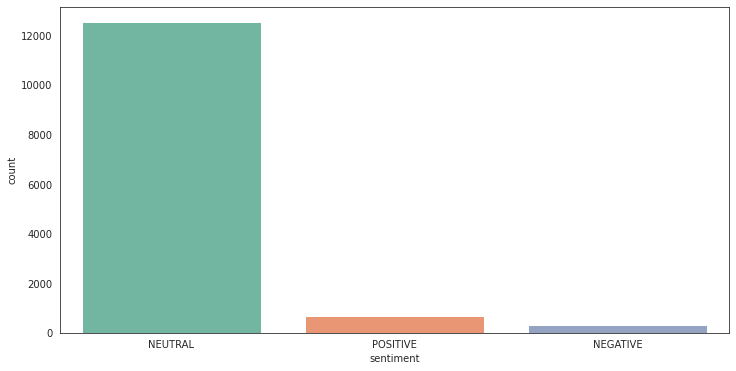

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', data=data)

In [83]:
fig = go.Figure(go.Funnelarea(
    text = var1.sentiment,
    values = var1.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [23]:
# most common words
temp = pd.DataFrame(count_all_words.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [24]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [26]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

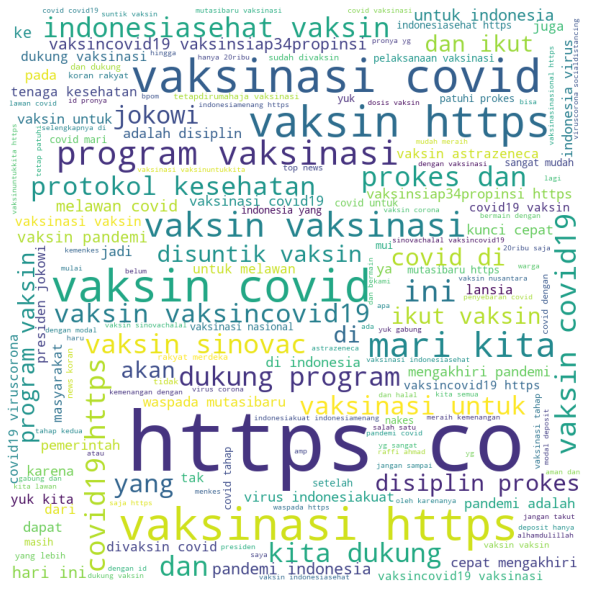

In [27]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

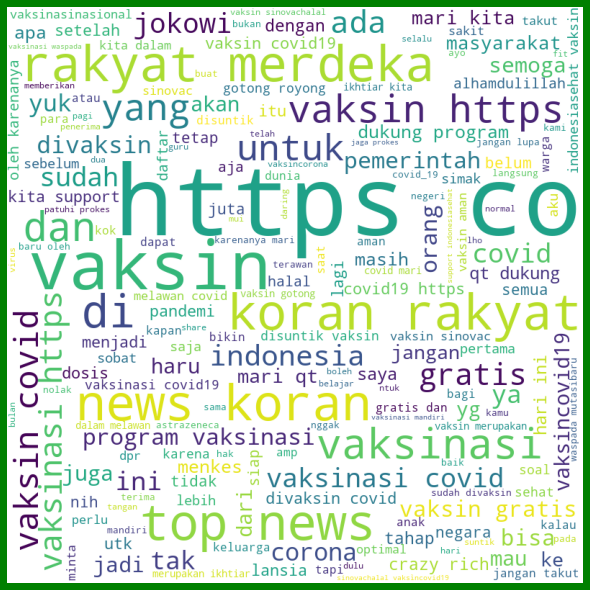

In [28]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = data[data["sentiment"]== "POSITIVE"] 
# iterate through the csv file 
for val in df_positive.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

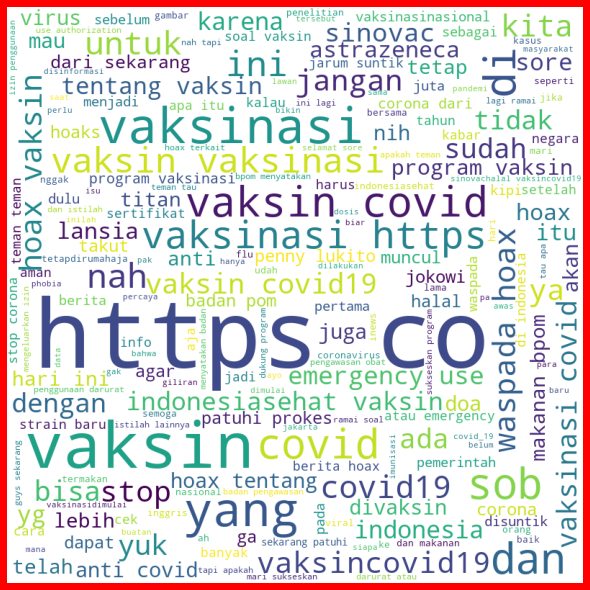

In [29]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_negative = data[data["sentiment"]== "NEGATIVE"] 
# iterate through the csv file 
for val in df_negative.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

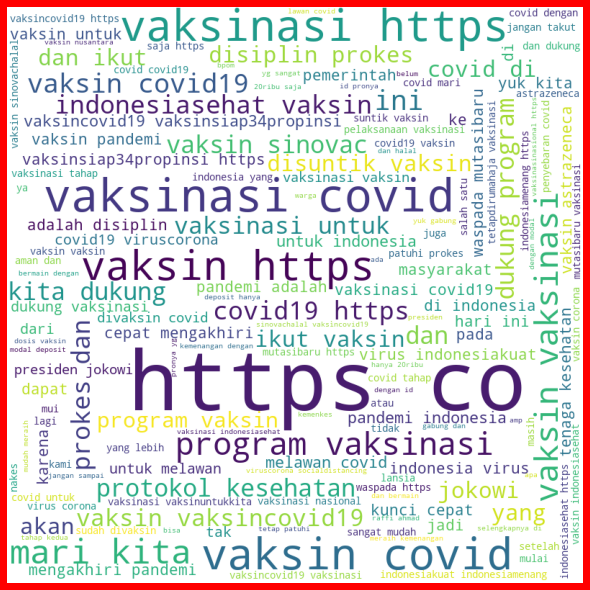

In [30]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_negative = data[data["sentiment"]== "NEUTRAL"] 
# iterate through the csv file 
for val in df_negative.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 